# Prepare

#### Now that we understand datetimes in pandas a bit better, let's utilize that knowledge to make some initial observations and address any issues in our data set

    - We will be working with the store data that we acquired previously and should be available in your acquire.py file.

In [1]:
# tabular data manipulation
import numpy as np
import pandas as pd

In [25]:
# datetime utilities
from datetime import timedelta, datetime

# visualization
import matplotlib.pyplot as plt

# no yelling in the library
import warnings
warnings.filterwarnings("ignore")

# our acquire script
from acquire import get_store_data

### Acquire 

Let's pick up where we left off.  We have our data from the api cached locally, so it will only take a moment.

In [26]:
#df = get_store_data()
#df.head(2)

In [27]:
df = pd.read_csv('complete_store_data.csv')

In [28]:
df.head(2)

,key_0,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,item,sale_amount,sale_date,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode
0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


In [29]:
df = df.drop(columns=['item', 'store'])

In [30]:
df.head(2)

,key_0,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,sale_amount,sale_date,sale_id,store_address,store_city,store_id,store_state,store_zipcode
0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


## Summarize

Let's go through and get a run-down of our data as we are accustomed to in this step.

We will:

    - Get the shape of our data
    - investigate for null values
    - contextualize the shape of our data

In [32]:
# number of rows and columns
df.shape

(913000, 15)

In [34]:
# null values by column
df.isnull().sum()

key_0            0
item_brand       0
item_id          0
item_name        0
item_price       0
item_upc12       0
item_upc14       0
sale_amount      0
sale_date        0
sale_id          0
store_address    0
store_city       0
store_id         0
store_state      0
store_zipcode    0
dtype: int64

In [39]:
# unique values of items
df.item_id.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [40]:
# unique values of  store_id
df.store_id.unique() 

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [41]:
# number of unique sales dates
df.sale_date.nunique() 

1826

In [42]:
1826 * 10 * 50

913000

In [43]:
# minimum date? maximum date?
df.sale_date.min(), df.sale_date.max()

('Fri, 01 Apr 2016 00:00:00 GMT', 'Wed, 31 May 2017 00:00:00 GMT')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   key_0          913000 non-null  int64  
 1   item_brand     913000 non-null  object 
 2   item_id        913000 non-null  int64  
 3   item_name      913000 non-null  object 
 4   item_price     913000 non-null  float64
 5   item_upc12     913000 non-null  int64  
 6   item_upc14     913000 non-null  int64  
 7   sale_amount    913000 non-null  float64
 8   sale_date      913000 non-null  object 
 9   sale_id        913000 non-null  int64  
 10  store_address  913000 non-null  object 
 11  store_city     913000 non-null  object 
 12  store_id       913000 non-null  int64  
 13  store_state    913000 non-null  object 
 14  store_zipcode  913000 non-null  int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 104.5+ MB


In [45]:
# Describe, info

In [46]:
df.describe()

,key_0,item_id,item_price,item_upc12,item_upc14,sale_amount,sale_id,store_id,store_zipcode
count,913000.000000,913000.000000,913000.000000,9.130000e+05,9.130000e+05,913000.000000,913000.000000,913000.000000,913000.000000
mean,25.500000,25.500000,5.160400,2.384688e+11,2.384688e+11,52.250287,456500.500000,5.500000,78224.800000
std,14.430878,14.430878,2.737764,2.978005e+11,2.978005e+11,28.801144,263560.542224,2.872283,16.479087
min,1.000000,1.000000,0.600000,8.500005e+09,8.500005e+09,0.000000,1.000000,1.000000,78201.000000
25%,13.000000,13.000000,2.970000,3.367410e+10,3.367410e+10,30.000000,228250.750000,3.000000,78217.000000
50%,25.500000,25.500000,5.195000,7.103651e+10,7.103651e+10,47.000000,456500.500000,5.500000,78220.500000
75%,38.000000,38.000000,7.520000,6.030842e+11,6.030842e+11,70.000000,684750.250000,8.000000,78232.000000
max,50.000000,50.000000,9.640000,8.846237e+11,8.846237e+11,231.000000,913000.000000,10.000000,78253.000000


Takeaways so far:



## Clean and Prepare

It looks like we don't have the right dates in min and max as a result of our datetime formatting.
Let's use what we learned yesterday as part of our cleaning and investigation now to address this.

We'll transform the column to a datetime, then we'll re-establish our index as the date.

In [47]:
# Reassign the sale_date column to be a datetime type
# Our current format includes the implication of a time, so we'll take an extra measure:
# .dt.date will take just the date property out of our converted datetime 
# (keep in mind .srtftime is also available for date formatting)

df.sale_date = pd.to_datetime(df.sale_date).dt.date

Set the index, and sort so we can ensure that its in chronological order.

In [48]:
df.head()

,key_0,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,sale_amount,sale_date,sale_id,store_address,store_city,store_id,store_state,store_zipcode
0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,13.0,2013-01-01,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,11.0,2013-01-02,2,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,14.0,2013-01-03,3,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
3,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,13.0,2013-01-04,4,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
4,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,10.0,2013-01-05,5,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


In [49]:
df = df.set_index('sale_date').sort_index()

In [50]:
df.head(2)

,key_0,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode
sale_date,,,,,,,,,,,,,,
2013-01-01,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2013-01-01,12,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217


### Defining Our Observations

Here we ask ourselves what each row (or observation) represents or measures.

In [51]:
df.head(1)

,key_0,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode
sale_date,,,,,,,,,,,,,,
2013-01-01,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


#### We observe here that the individual rows are not unique by their date.  What does each row represent?
It looks like we have differing pairs of stores and items on each row -- it seems likely that each row is an instance of an individual sale occuring at a specific store for a specific item.

We can see that we have a sale_id column, which warms toward that hunch.  Let's see if those values repeat at all:

In [52]:
df.shape[0], df.sale_id.nunique()

(913000, 913000)

It looks like each sale id does uniquely identify each row and each row is a combination of one item sold at one store. So each observation is the quantity of items sold on one day, in one store. 

### Let's get to know our data a bit better
- Currently, the dataframe has one row per sold item, but what if we need more or less granularity?
- Let's get to know our data then consider what it means to define our observation in different ways.
- We'll also look at different time-windows for our data.

#### Plot Target Variable Over Time
Generate a quick plot of our target variable over time, the variable we wish to forecast or predict. 
We will first aggregate the `sale_amount` by `sale_date` using `sum()`, i.e. group by sale_date and sum the sale_amount. We will then do a quick plot of this aggregated data. 

In [54]:
by_date = df.groupby(['sale_date']).sale_amount.sum()

In [56]:
by_date.head()

sale_date
2013-01-01    13696.0
2013-01-02    13678.0
2013-01-03    14488.0
2013-01-04    15677.0
2013-01-05    16237.0
Name: sale_amount, dtype: float64

<AxesSubplot:xlabel='sale_date'>

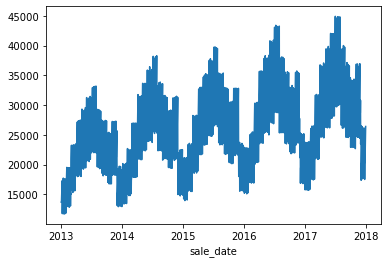

In [58]:
by_date.plot()

<AxesSubplot:xlabel='sale_date'>

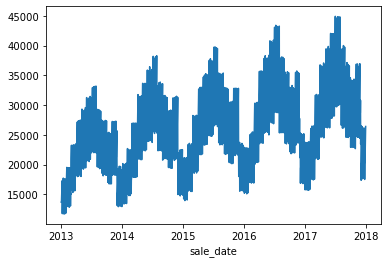

In [57]:
by_date.plot(x='sale_date', y='sale_amount')

Is each store equally represented in this dataset?

In [59]:
# Number of observations per store = number of item-transactions per store.
df.store_id.value_counts()

1     91300
2     91300
3     91300
4     91300
5     91300
6     91300
7     91300
8     91300
9     91300
10    91300
Name: store_id, dtype: int64

Is each item equally represented in this dataset?

In [61]:
df.item_id.value_counts().sort_index()

1     18260
2     18260
3     18260
4     18260
5     18260
6     18260
7     18260
8     18260
9     18260
10    18260
11    18260
12    18260
13    18260
14    18260
15    18260
16    18260
17    18260
18    18260
19    18260
20    18260
21    18260
22    18260
23    18260
24    18260
25    18260
26    18260
27    18260
28    18260
29    18260
30    18260
31    18260
32    18260
33    18260
34    18260
35    18260
36    18260
37    18260
38    18260
39    18260
40    18260
41    18260
42    18260
43    18260
44    18260
45    18260
46    18260
47    18260
48    18260
49    18260
50    18260
Name: item_id, dtype: int64

It looks like both items and stores are equally represented, that is, each store shows up the same number of times and so does each item.

### Explore Stores + Items

There are 50 different items and there were 18,260 sales for each item. 

We will explore the data behind the unique combinations of store & item.   
For example, what was the first sale date for each store/item combination?
What was the last sale date?   
On how many different days was each item sold at each store?   

First, we will want to reset the index so that sale_date becomes a feature we can use in an aggregate.   
Next, we will group by store_id and item_id. 
Finally, we will perform the aggregates needed to answer the questions. 

Let's find the first sale date for each store/item combination:

In [62]:
# reset idex to reference it as a column
# aggregate by the store and item paring
# use min() method to assert that all item/store values start on the same day
first_sale = df.reset_index().groupby(['store_id', 'item_id']).sale_date.min()
first_sale.head()

store_id  item_id
1         1          2013-01-01
          2          2013-01-01
          3          2013-01-01
          4          2013-01-01
          5          2013-01-01
Name: sale_date, dtype: object

Is Jan 1, 2013 the first date for all store/item combinations?

In [63]:
# get the unique dates from first_sale_per_storeitem
first_sale.unique() # if there's only one unique value, then YES!

array([datetime.date(2013, 1, 1)], dtype=object)

In [ ]:
# What is the last (i.e. most recent) sale date for each store/item combination?

In [64]:
last_sale = df.reset_index().groupby(['store_id', 'item_id']).sale_date.max()
last_sale.head()

store_id  item_id
1         1          2017-12-31
          2          2017-12-31
          3          2017-12-31
          4          2017-12-31
          5          2017-12-31
Name: sale_date, dtype: object

Is Dec 31, 2107 the last date for all store/item combinations? 

In [65]:
if last_sale.nunique() == 1:
    print('december 31 2017 is the last date for all store/item pairs') # if there's only one unique value, then YES!

december 31 2017 is the last date for all store/item pairs


On how many different days was each item sold at each store?

In [68]:
days_per_store_per_item = df.reset_index().groupby(['store_id', 'item_id']).sale_date.nunique()
days_per_store_per_item.head()

store_id  item_id
1         1          1826
          2          1826
          3          1826
          4          1826
          5          1826
Name: sale_date, dtype: int64

Did every store sell at least one of every item on every day in the data's time span? 

In [69]:
# If there's only one unique value in the list, then YES!
# every store sold every item on every one of the 1826 days in our data history.
days_per_store_per_item.unique()

array([1826])

## Check for time gaps in the data

While there might not be nulls present in our data, the time observations may leave a gap that we need to be able to detect. We can check the number of rows vs. the number of days that should exist between the minimum and maximum dates to see if there are any missing days.

In [70]:
df.head()

,key_0,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode
sale_date,,,,,,,,,,,,,,
2013-01-01,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2013-01-01,12,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217
2013-01-01,46,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,27.0,832657,12018 Perrin Beitel Rd,San Antonio,7,TX,78217
2013-01-01,12,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,54.0,213643,15000 San Pedro Ave,San Antonio,8,TX,78232
2013-01-01,12,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,35.0,215469,735 SW Military Dr,San Antonio,9,TX,78221


In [75]:
print('Number of days:', df.index.nunique())
n_days = df.index.max() - df.index.min() + pd.Timedelta('1d')
print(f"Number of days between first and last day:", n_days)

Number of days: 1826
Number of days between first and last day: 1826 days 00:00:00


In [74]:
df.index.max() - df.index.min()

datetime.timedelta(days=1825)

### Reproducibility

We'll now encapsulate all the preparation work that we've done into a single function, and store that function in `prepare.py` so that we can reference it again later.

In [76]:
def prep_store_data(df):
    return df.asign(sale_date=pd.to_datetime(df.sale_date)).sort_values('sale_date').set_index('sale_date')

## Data Splitting

Splitting time series data into train, test, and validate sets is a little trickier than with previous data we have looked at.
Because the data points have an order to them, we cannot simply assign each point randomly to train, validate, or test.

Ideally all splits should contain one season's worth of data. There are several methods we can use to split our time series data:

- Human-based: use, for example, the last year in the dataset as test split
- Percentage based: use the last 20% as test
- Cross Validate: break data up into slices and use successive slices as train and test repeatedly (`sklearn.model_selection.TimeSeriesSplit`)

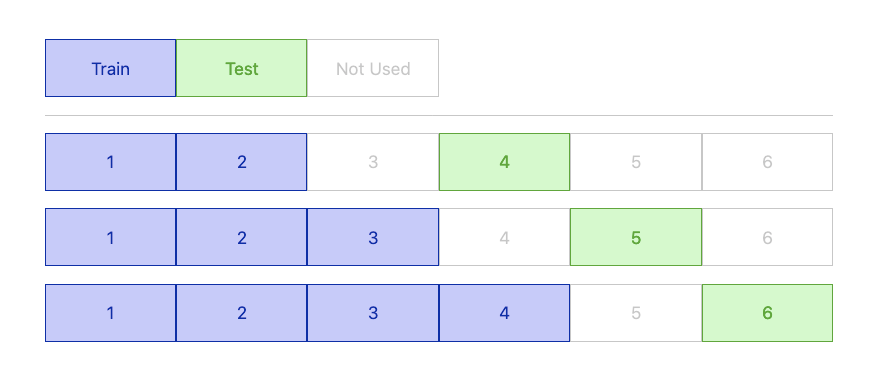

We'll explore data splitting in more depth in the next lesson.

## Further Reading

- [Pandas Documentation: Timeseries](https://pandas.pydata.org/pandas-docs/stable/timeseries.html)
- [Working with Time Series](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html)
- [Pandas Reference for Time Series](https://ds.codeup.com/9-timeseries/working-with-time-series-data-with-pandas/)


## Exercises

The end result of this exercise should be a file named `prepare.py`.

Using your store items data:

1. Convert date column to datetime format.  
1. Plot the distribution of `sale_amount` and `item_price`.  
1. Set the index to be the datetime variable.
1. Add a 'month' and 'day of week' column to your dataframe.
1. Add a column to your dataframe, `sales_total`, which is a derived from `sale_amount` (total items) and `item_price`.  
1. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

Using the OPS data acquired in the Acquire exercises `opsd_germany_daily.csv`, complete the following:

1. Convert date column to datetime format.  
1. Plot the distribution of each of your variables.  
1. Set the index to be the datetime variable.  
1. Add a month and a year column to your dataframe.
1. Fill any missing values.
1. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.